In [ ]:
# Install OpenCV
!pip install opencv-python-headless

# Install Tesseract and its Python wrapper
!sudo apt-get install tesseract-ocr
!pip install pytesseract

# Install Pillow (PIL)
!pip install Pillow


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (11.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [ ]:
!apt-get update
!apt-get install -y tesseract-ocr
!pip install opencv-python-headless pillow pytesseract numpy


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,665 kB]
Get:14 https://deve

Detected text:
MH20EE7602



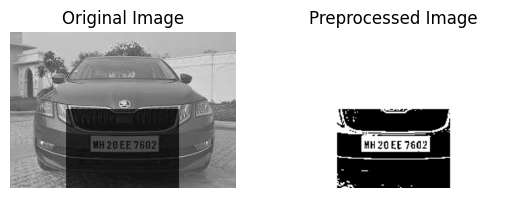

In [ ]:
import cv2
import numpy as np
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt

image_path = 'car.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
blurred = cv2.GaussianBlur(image, (3, 3), 0.31)
_, mask = cv2.threshold(blurred, 37, 255, cv2.THRESH_BINARY)

# Resize
scale_factor = 6.0
resized_image = cv2.resize(mask, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)

# print
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(resized_image, cmap='gray')
plt.title("Preprocessed Image")
plt.axis('off')

# Detect text
config = "--psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
text = pytesseract.image_to_string(Image.fromarray(resized_image), config=config)
print("Detected text:")
print(text)


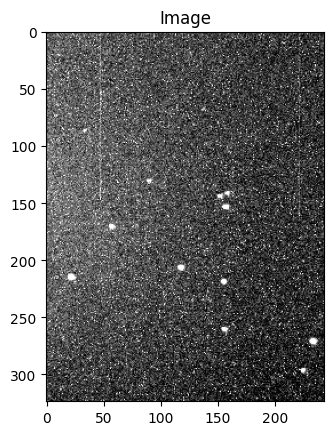

Number of stars: 14
Cordinates:
(224, 296)
(233, 271)
(155, 260)
(155, 218)
(21, 214)
(117, 206)
(57, 170)
(156, 153)
(152, 144)
(158, 141)
(6, 137)
(89, 130)
(1, 117)
(7, 74)


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import re

file_path = 'input1.txt'
with open(file_path, 'r') as file:
    data = file.read()

pixel_data = re.findall(r'\((\d+),\s*(\d+),\s*(\d+)\)', data)
pixels = [(int(r), int(g), int(b)) for r, g, b in pixel_data]
num_pixels = len(pixels)
channels = 3
image_data = np.array(pixels, dtype=np.uint8).reshape((324, 244, channels))
image_rgb = cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
_, thresh = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

star_count = 0
star_cordinates = []
for cnt in contours:
    M = cv2.moments(cnt)
    if M["m00"] > 5:
        star_count += 1
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        star_cordinates.append((cX, cY))

plt.imshow(image_rgb)
plt.title("Image")
plt.show()
print("Number of stars:", star_count)
print("Cordinates:")
for cord in star_cordinates:
    print(cord)

In [ ]:
!pip install torch torchvision


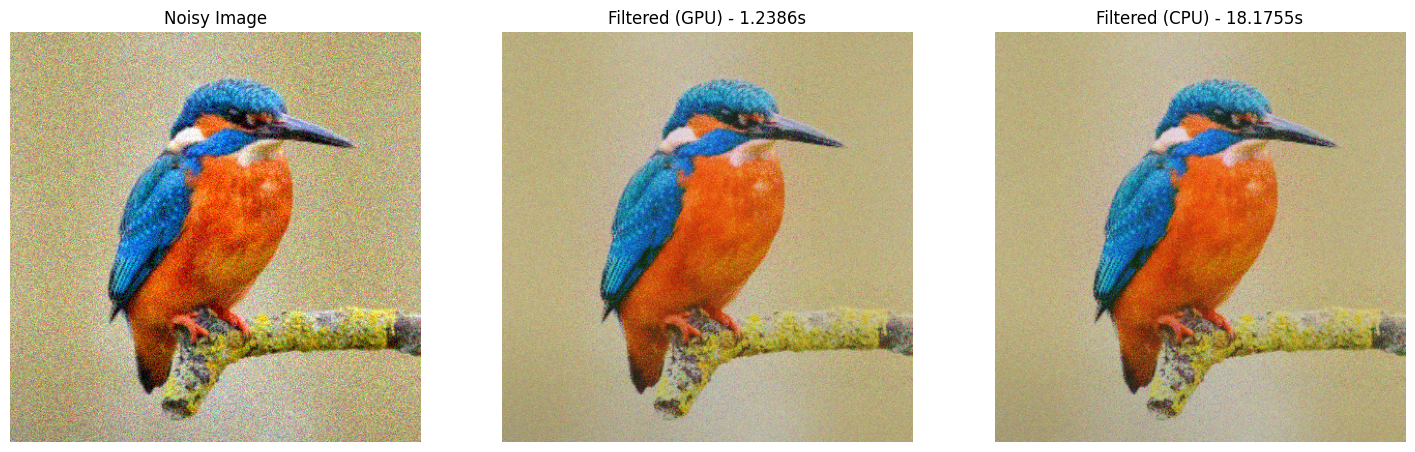

Time on CPU: 18.1755 s
Time on GPU: 1.2386 s
CPU/GPU: 14.6742


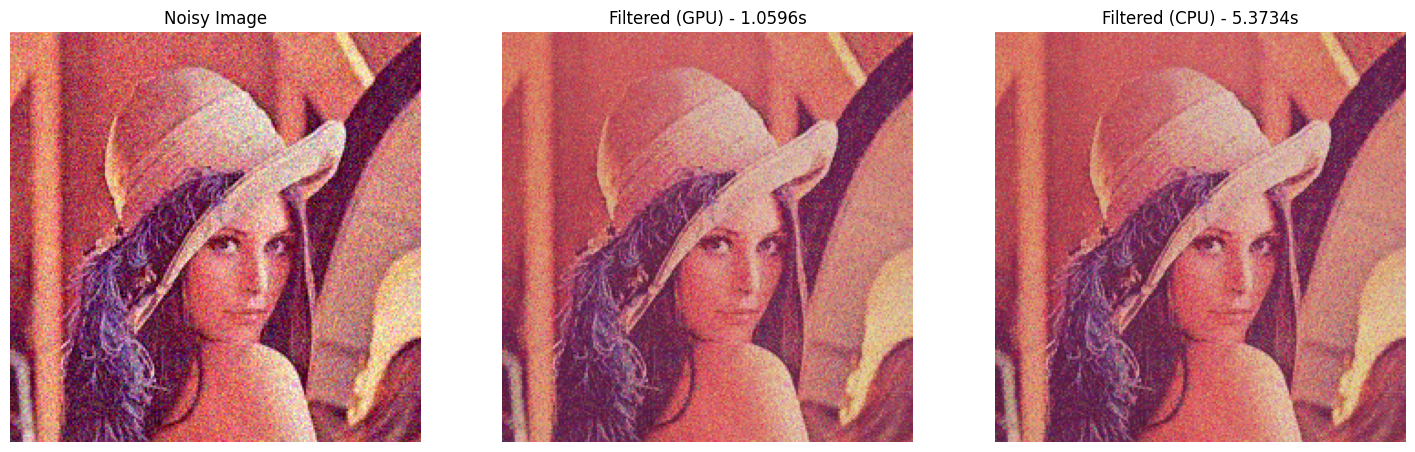

Time on CPU: 5.3734 s
Time on GPU: 1.0596 s
CPU/GPU: 5.0710


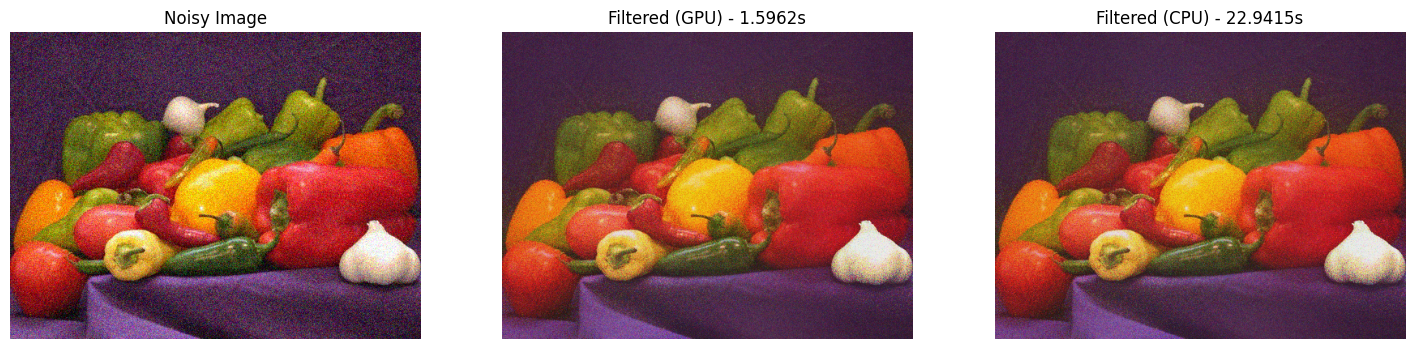

Time on CPU: 22.9415 s
Time on GPU: 1.5962 s
CPU/GPU: 14.3726


In [16]:
import torch
import torchvision.transforms.functional as F
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time

def add_noise(img_tensor, mu=0, sig=0.1):
    # Generate random noise tensor with the same shape as input
    noise = torch.normal(mu, sig, size=img_tensor.size(), device=img_tensor.device)
    img_noisy = img_tensor + noise
    img_noisy = torch.clamp(img_noisy, 0, 1)  # Keep values in [0, 1] range
    return img_noisy

def nl_means(img, k_size=7, s_size=21, beta=0.1):
    pad = s_size // 2
    img_pad = torch.nn.functional.pad(img, (pad, pad, pad, pad), mode='reflect')
    out = torch.zeros_like(img)
    w_sum = torch.zeros_like(img)

    for dx in range(-pad, pad + 1):
        for dy in range(-pad, pad + 1):
            shifted = img_pad[:, :, pad + dx : pad + dx + img.size(2), pad + dy : pad + dy + img.size(3)]
            diff = (img - shifted) ** 2
            w = torch.exp(-diff / (beta ** 2))
            out += w * shifted
            w_sum += w

    out /= w_sum
    return out

def run_denoising(img_path, k_size=7, s_size=21, beta=1):
    img_orig = Image.open(img_path).convert('RGB')
    img_tensor = F.to_tensor(img_orig).unsqueeze(0)  # Convert and add batch dimension
    img_noisy = add_noise(img_tensor, mu=0, sig=0.1)

    # GPU
    img_gpu = img_noisy.cuda()
    gpu_start = time.time()
    img_denoised_gpu = nl_means(img_gpu, k_size=k_size, s_size=s_size, beta=beta)
    torch.cuda.synchronize()
    time_gpu = time.time() - gpu_start
    # CPU
    img_cpu = img_noisy.cpu()
    cpu_start = time.time()
    img_denoised_cpu = nl_means(img_cpu, k_size=k_size, s_size=s_size, beta=beta)
    time_cpu = time.time() - cpu_start

    # tensors to images
    img_noisy_pil = F.to_pil_image(img_noisy.squeeze(0))
    img_denoised_pil_gpu = F.to_pil_image(img_denoised_gpu.squeeze(0).cpu())
    img_denoised_pil_cpu = F.to_pil_image(img_denoised_cpu.squeeze(0))

    # Plotting
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(img_noisy_pil)
    plt.title("Noisy Image")
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(img_denoised_pil_gpu)
    plt.title(f"Filtered (GPU) - {time_gpu:.4f}s")
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(img_denoised_pil_cpu)
    plt.title(f"Filtered (CPU) - {time_cpu:.4f}s")
    plt.axis('off')
    plt.show()

    print(f"Time on CPU: {time_cpu:.4f} s")
    print(f"Time on GPU: {time_gpu:.4f} s")
    print(f"CPU/GPU: {time_cpu / time_gpu:.4f}")

# test
run_denoising('bird.jpg', k_size=5, s_size=100, beta=0.2)
run_denoising('woman.jpg', k_size=5, s_size=100, beta=0.2)
run_denoising('vegetables.jpg', k_size=5, s_size=100, beta=0.2)


In [2]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 14.1 MB/s eta 0:00:00


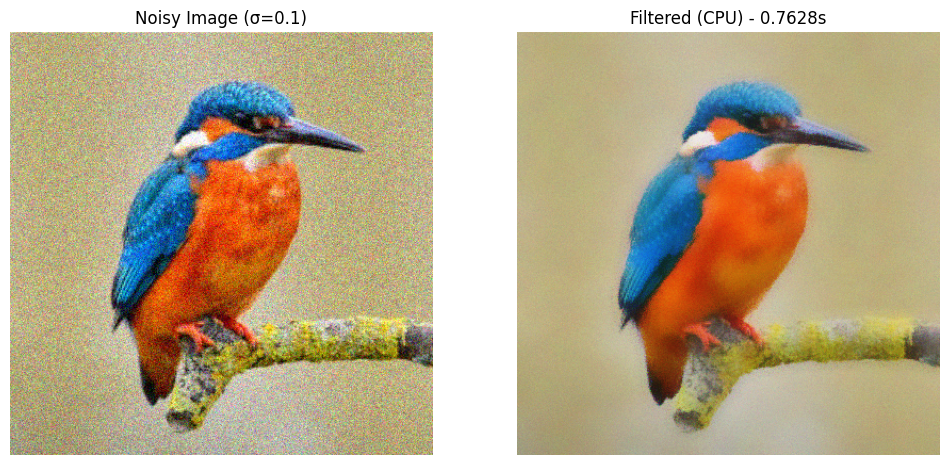

Noise Level: 0.1
Time on CPU: 0.7628 s
PSNR: 27.4934 dB
SSIM: 0.6852



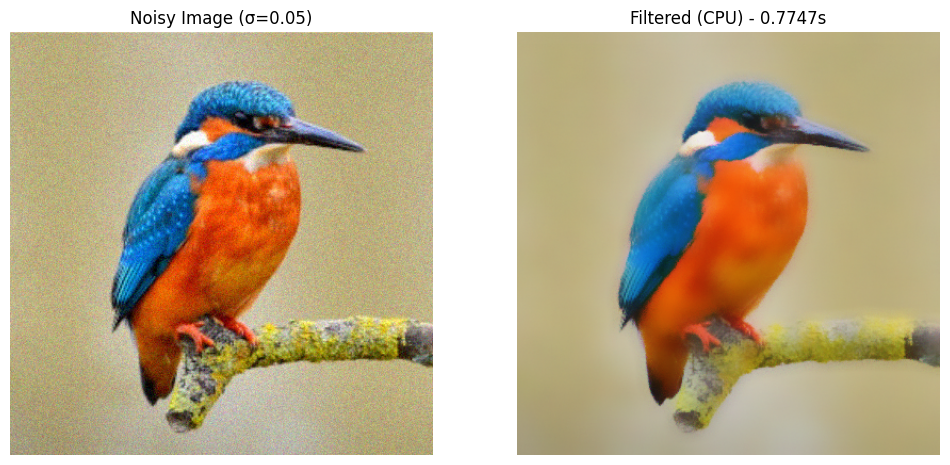

Noise Level: 0.05
Time on CPU: 0.7747 s
PSNR: 29.0888 dB
SSIM: 0.8753



In [ ]:
import torch
import torchvision.transforms.functional as F
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
from skimage.metrics import structural_similarity as ssim
from torchmetrics.functional import peak_signal_noise_ratio as psnr

def add_noise(img_tensor, mu=0, sig=0.1):
    # Generate random noise tensor with the same shape as input
    noise = torch.normal(mu, sig, size=img_tensor.size(), device=img_tensor.device)
    img_noisy = img_tensor + noise
    img_noisy = torch.clamp(img_noisy, 0, 1)  # Keep values in [0, 1] range
    return img_noisy

def approx_nl_means(img, k_size=7, s_size=21, beta=0.1):
    pad = s_size // 2
    img_pad = torch.nn.functional.pad(img, (pad, pad, pad, pad), mode='reflect')
    out = torch.zeros_like(img)
    w_sum = torch.zeros_like(img)

    for dx in range(-pad, pad + 1):
        for dy in range(-pad, pad + 1):
            shifted = img_pad[:, :, pad + dx : pad + dx + img.size(2), pad + dy : pad + dy + img.size(3)]
            diff = (img - shifted) ** 2
            w = torch.exp(-diff / (beta ** 2))
            out += w * shifted
            w_sum += w

    out /= w_sum
    return out

def compute_ssim(img1, img2):
    # Convert tensors to numpy arrays
    img1_np = img1.squeeze(0).cpu().permute(1, 2, 0).numpy()
    img2_np = img2.squeeze(0).cpu().permute(1, 2, 0).numpy()

    # Determine the win_size to avoid exceeding image dimensions
    min_dim = min(img1_np.shape[0], img1_np.shape[1])
    win_size = min(7, min_dim) if min_dim >= 7 else min_dim  # Ensure win_size <= image dimensions

    # Compute SSIM with data_range explicitly provided
    return ssim(img1_np, img2_np, multichannel=True, win_size=win_size, channel_axis=-1, data_range=1.0)

def run_denoising(img_path, k_size=7, s_size=21, beta=1, noise_levels=[0.1]):
    img_orig = Image.open(img_path).convert('RGB')
    img_tensor = F.to_tensor(img_orig).unsqueeze(0)  # Convert and add batch dimension

    for noise_level in noise_levels:
        # Add Gaussian noise
        img_noisy = add_noise(img_tensor, mu=0, sig=noise_level)

        # CPU Processing: Apply non-local means filtering
        cpu_start = time.time()
        img_denoised_cpu = approx_nl_means(img_noisy, k_size=k_size, s_size=s_size, beta=beta)
        time_cpu = time.time() - cpu_start

        # Compute PSNR and SSIM for CPU output
        psnr_value = psnr(img_tensor, img_denoised_cpu.clamp(0, 1), data_range=1.0)
        ssim_value = compute_ssim(img_tensor, img_denoised_cpu)

        # tensors to images for plotting
        img_noisy_pil = F.to_pil_image(img_noisy.squeeze(0))
        img_denoised_pil_cpu = F.to_pil_image(img_denoised_cpu.squeeze(0))

        # Plotting
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(img_noisy_pil)
        plt.title(f"Noisy Image (σ={noise_level})")
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.imshow(img_denoised_pil_cpu)
        plt.title(f"Filtered (CPU) - {time_cpu:.4f}s")
        plt.axis('off')
        plt.show()

        print(f"Noise Level: {noise_level}")
        print(f"Time on CPU: {time_cpu:.4f} s")
        print(f"PSNR: {psnr_value:.4f} dB")
        print(f"SSIM: {ssim_value:.4f}\n")

# Run the denoising for different images and noise levels
noise_levels = [0.1, 0.05, 0.2, 0.25]
run_denoising('bird.jpg', k_size=5, s_size=21, beta=0.3, noise_levels=noise_levels)
run_denoising('woman.jpg', k_size=5, s_size=21, beta=0.3, noise_levels=noise_levels)
run_denoising('vegetables.jpg', k_size=5, s_size=21, beta=0.3, noise_levels=noise_levels)
